## Characterizing UV channels - OceanOptics spectrometer
Data was collected with the light logger before the system was embedded into epoxy resin. 

Empty row found: ['436,929', '13853,78', '']
Empty row found: ['437,292', '13646,12', '']
Empty row found: ['437,654', '13570,52', '']
Empty row found: ['438,016', '13670,98', '']
Empty row found: ['438,378', '13348,87', '']
Empty row found: ['438,74', '13169,18', '']
Empty row found: ['439,103', '12799,94', '']
Empty row found: ['439,465', '12105,49', '']
Empty row found: ['439,827', '10620,79', '']
Empty row found: ['440,189', '8863,18', '']
Empty row found: ['440,551', '6989,05', '']
Empty row found: ['440,913', '5620,87', '']
Empty row found: ['441,274', '4509,54', '']
Empty row found: ['441,636', '3595,01', '']
Empty row found: ['441,998', '2806,31', '']
Empty row found: ['442,36', '2108,75', '']
Empty row found: ['442,721', '1619,38', '']
Empty row found: ['443,083', '1211,82', '']
Empty row found: ['443,445', '897,48', '']
Empty row found: ['443,806', '738,5', '']
Empty row found: ['444,168', '649,94', '']
Empty row found: ['444,529', '648,39', '']
Empty row found: ['444,891', '

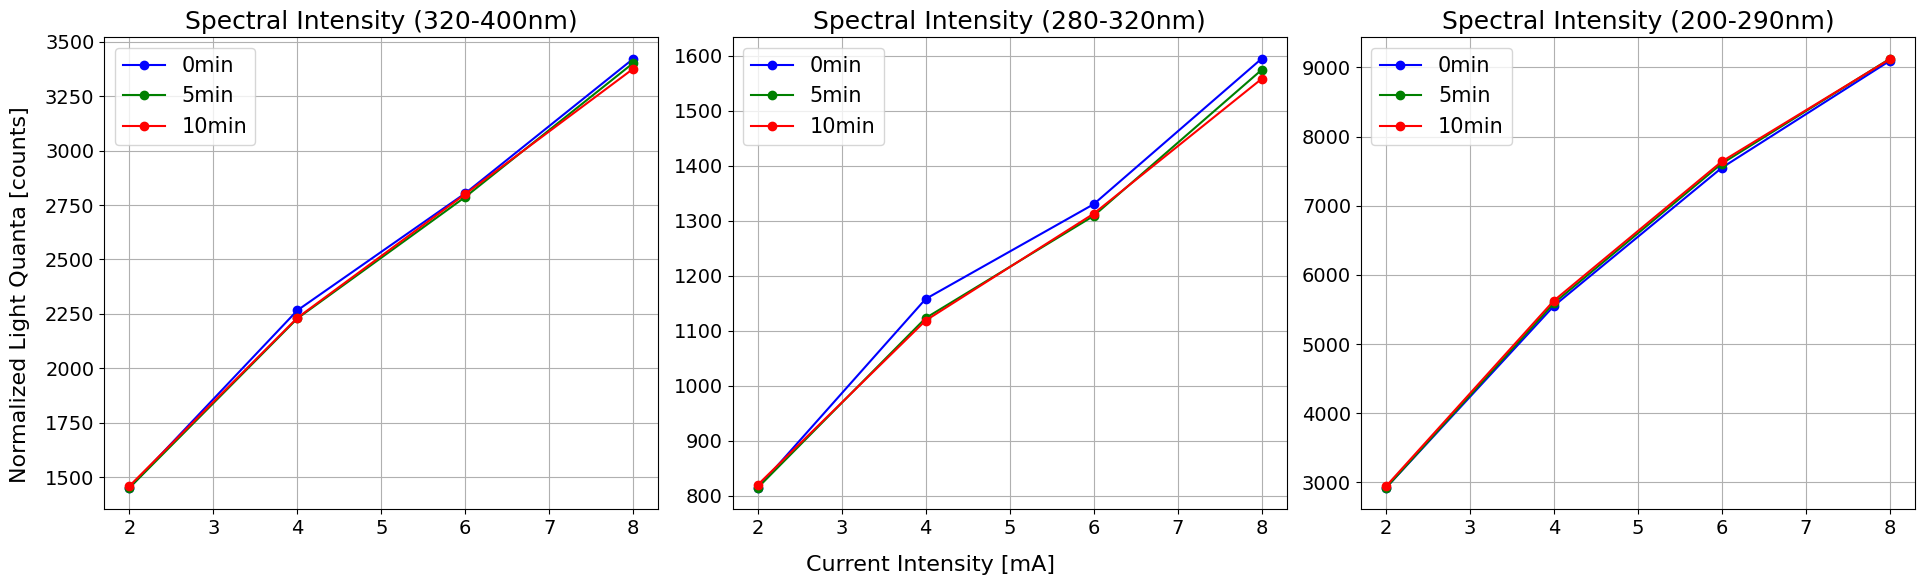

In [4]:
import csv
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Function to read the CSV file and perform calculations
def calculate_integral(filename, lower_bound, upper_bound):
    wavelengths = []
    divided_by_50 = []

    # Read the CSV file
    with open(filename, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)  # Skip the header
        for row in reader:  # Check if the row is not empty
            if row and all(row):  # Convert and add values
                wavelength = float(row[0].replace(',', '.'))
                divided = float(row[2].replace(',', '.'))
                wavelengths.append(wavelength)
                divided_by_50.append(divided) # , the output values were normalized by dividing them by the predetermined integration time -> 50
            else:
                print("Empty row found:", row)

    # Set integral bounds
    filtered_data = [(wavelength, divided) for wavelength, divided in zip(wavelengths, divided_by_50)
                     if lower_bound <= wavelength <= upper_bound]

    # Calculate the integral
    x_values = [data[0] for data in filtered_data]
    y_values = [data[1] for data in filtered_data]
    integral = simps(y_values, x_values)

    return integral

# List of 12 CSV files
filenames = ['file1.csv', 'file2.csv', 'file3.csv', 'file4.csv', 'file5.csv', 'file6.csv',
             'file7.csv', 'file8.csv', 'file9.csv', 'file10.csv', 'file11.csv', 'file12.csv']

# Filenames grouped by current intensity
current_groups = {
    '2mA': filenames[:3],
    '4mA': filenames[3:6],
    '6mA': filenames[6:9],
    '8mA': filenames[9:]}

# Filenames grouped by time points
time_groups = {
    '0min': [0, 3, 6, 9],
    '5min': [1, 4, 7, 10],
    '10min': [2, 5, 8, 11]}

colors = {'0min': 'blue', '5min': 'green', '10min': 'red'}

# Wavelength ranges for the three plots
wavelength_ranges = [
    (320, 400),  # Plot 1: 320-400 nm
    (280, 320),  # Plot 2: 280-320 nm
    (200, 290)   # Plot 3: 200-290 nm
]

# Create subplots (1x3 grid)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Define font sizes
label_fontsize = 16   # Font size for axis labels
title_fontsize = 18   # Font size for titles
tick_fontsize = 14    # Font size for tick labels
legend_fontsize = 15  # Font size for the legend

# Loop over wavelength ranges
for idx, (lower_bound, upper_bound) in enumerate(wavelength_ranges):
    for time_point, files in time_groups.items():
        integrals = [calculate_integral(filenames[i], lower_bound, upper_bound) for i in files]
        axs[idx].plot([2, 4, 6, 8], integrals, label=f'{time_point}', color=colors[time_point], marker='o', linestyle='-')
    
    # Subplot settings
    axs[idx].set_title(f'Spectral Intensity ({lower_bound}-{upper_bound}nm)', fontsize=title_fontsize)
    axs[idx].legend(fontsize=legend_fontsize)
    axs[idx].grid(True)
    
    # Font size for tick labels
    axs[idx].tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Common x and y axis labels
fig.text(0.5, 0.04, 'Current Intensity [mA]', ha='center', fontsize=label_fontsize)                                 # x-axis label at the bottom
fig.text(0.04, 0.5, 'Normalized Light Quanta [counts]', va='center', rotation='vertical', fontsize=label_fontsize)  # y-axis label on the left

# Adjust layout and display the plot
plt.tight_layout(rect=[0.05, 0.07, 1, 1]) 
plt.show()

